<a href="https://colab.research.google.com/github/rgumi/dataScience/blob/master/rental_prices_single_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, train_test_split

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/saschaschworm/big-data-and-data-science/master/datasets/demos/rental-prices.csv')
X, y = data[['apartment_size']], data['rental_price']

hyperparams = {'loss': 'squared_loss', 'penalty': 'none', 'alpha': 0.0001, 'max_iter': 1000, 
               'tol': 1e-3, 'random_state': 1909, 'eta0': 0.0001}

model = SGDRegressor(**hyperparams)
model = model.fit(X, y)

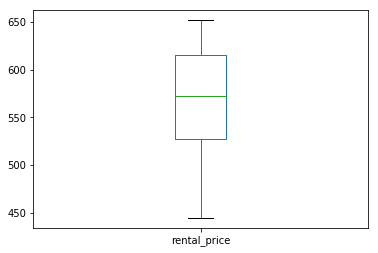

In [45]:
# data.plot?
data.plot(x="apartment_size", y="rental_price", kind="box") # scatter

In [41]:
data.describe(percentiles=[.01,.99])

,apartment_size,rental_price,age
count,40.000000,40.000000,40.000000
mean,51.493500,564.651000,13.475000
std,5.516504,61.489558,16.392599
min,40.380000,444.720000,5.000000
1%,40.387800,446.892300,5.000000
50%,52.150000,572.515000,7.500000
99%,59.453000,647.794000,53.000000
max,59.570000,651.460000,53.000000


In [35]:
prediction = model.predict([[44]])
f'Prediction for a 44sqm Apartment: {prediction[0]:.2f} EUR'

'Prediction for a 44sqm Apartment: 482.01 EUR'

In [24]:
res_params = [*model.intercept_.tolist(), *model.coef_.tolist()]
f'Learned Parameters: {res_params}'

'Learned Parameters: [0.24185631513843506, 10.94916974514499]'

In [25]:
res_loss_function = np.sum(np.power(y - model.predict(X), 2)) * 0.5
f'Loss Function Value: {res_loss_function:.2f}'

'Loss Function Value: 44950.53'

In [26]:
res_rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
f'RMSE on the Training Set: {res_rmse:.2f} EUR'

'RMSE on the Training Set: 47.41 EUR'

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1909)

In [0]:
model = model.fit(X_train, y_train)

In [29]:
y_pred_tr, y_pred_te = model.predict(X_train), model.predict(X_test) 
res_rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
res_rmse_te = np.sqrt(mean_squared_error(y_test, y_pred_te))
f'RMSE on Training and Test Set: {res_rmse_tr:.2f}/{res_rmse_te:.2f} EUR'

'RMSE on Training and Test Set: 50.58/36.41 EUR'

In [0]:
scoring = 'neg_mean_squared_error'
res_cv = cross_validate(model, X, y, scoring=scoring, cv=10, return_train_score=True)

In [31]:
res_rmse_tr = np.mean(np.sqrt(np.abs(res_cv['train_score'])))
res_rmse_te = np.mean(np.sqrt(np.abs(res_cv['test_score'])))
f'Average RMSE on Training and Test Set: {res_rmse_tr:.2f}/{res_rmse_te:.2f} EUR'

'Average RMSE on Training and Test Set: 47.28/45.58 EUR'